In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Stationarity

There is strong form and semi-strong form - where the mean and variance (and perhaps covariance) are independent of time. White noise is stationary. Random walk is actually not stationary as the variance increases with time: we know a lot less about the possible values of a series a time far off in the future than we do one nearer in time. Lack of stationarity does not lend itself to modeling as the number of parameters is great to account for the changing nature of the mean and variance. We can make adjustments/transformations to the series to make it stationary. These include a mix of lag differences (appropriate for series with seasonalities) and log transforms to remove trended data.


### Using the autocorr()
Autocorrelation tests for correlation of a time series lagging the independent variable. A statistically significant autocorrelation statistic implies the absence of white noise... there is a non-random component to the path of returns. Removing this seasonality from the time series with a diff() application, can turn the series stationary. This can be tested by re-running the autocorr function acf().

difference between a random walk and white noise... returns can be analyzed via probabilities;
stock price is more a random walk but with a base value... and follows an additive model

random walk: P(t) = P(t-1) + noise, ie realization of a statistical distribution... the difference in today's price to yesterday's is white noise. Recall that if you take the log of the nominal value of a stock, then take the difference of logged prices - that serves as an approximation to returns. You cannot forecast a random walk. 
Some expressions of random walks have drift: P(t) = drift constant + P(t-1) + white noise value
Subsequenty: P(t) - P(t-1) = drift constant + white noise value... which will have average return of the drift constant instead of 0
white noise = 
white noise has constant mean and constant variance and 0 autocorrelation at all lags... making this the perfect case of stationary. Stock market RETURNS are a good expression of white noise.
Random walk is an additive series

### TESTS FOR RANDOM WALK 
regress prices over some lag of prices... if the coefficient is significantly less than 1 then we have evidence that the series is not a random walk; regression equation: $P_{t} = intercept + \rho*P_{t-1} + \epsilon$... this is same as the random walk equation when the coefficient = 1. Otherwise stated, if the coefficient term is equal to 1, there is presence of a unit root and the series is non stationary.
An identical test for random walk: regress the difference in price P(t) - P(t-1) on the lag price. The hypothesis test in this permutation is based on a coefficient of 0, wherein a coefficient significantly less than 0 indicates a lack of random walk. This is a **Dickey-Fuller** test. **Augmented DF** test includes more lags on the right hand side of the equation. 
Augmented DF is part of the statsmodels.tsa.stattools package. Here, we're interested in the p-value of the test. adfuller() is to be run on a series of prices. If the p-value is above a certain threshhold, we cannot reject the null hypothesis that there is a unit root. Presence of a unit root requires differencing to arrive at stationarity. **Absence of a unit root is a proxy for stationarity.** For example, the mean can be increasing/decreasing over time. The null hypothesis of DF test is that a unit root is present in the autoregressive model. The alternative hypothesis is typically a variant of stationarity.

Three kinds of DF tests:
1. Test for a unit root
2. Test for a unit root with drift
3. test for a unit root with drift AND deterministic time trend

All three set the first difference of the value as the dependent variable. For each permutation, the null hypothesis is that there is a unit root = 0. Recall that a unit root in this framework is represented by a 0 coefficient, but takes on the form a '1' in the standard random walk equation:
$Y_{t}=\delta +\rho*Y_{t-1} +\epsilon$.  The above permutations set the dependent variable to $\Delta$Y... this can be arrived at by subtracting $Y_{t-1}$ from both sides of the equation.


Autocorrelation: delayed/lagged correlation of a given series... delayed some specific number of time units. Patterns of autocorrelation can take the form of plotted residuals or values by time. Imposing a transformation of autocorrelated data removes the autocorrelation and converts the series to a stationary one.

Stationarity: statistical properties (mean, variance) are constant over time.
Transformations to bring a dataset into stationarity:
a) remove the underlying trend of a trend stationary process - the trend is solely a function of time
b) A process with one or more unit roots can be made stationary through differencing
Ex.s of a stationary process: white noise, discrete-time stationary process with continuous sample space: autoregressive and moving average processes

Notable violations of stationarity: seasonality, random walk (has a growing variance with time), white noise with a drift constant

Transformations: apply a log to prices to eliminate exponential growth, and therefore a growing variance in price over time

### AR MODELS
P(t) = mean + coefficient\*P(t-1) + error term (can be white noise)...
Coefficients: if 1 = the model and series is random walk; if 0, the process is white noise.
For stationarity and stability, the coefficient has to be between -1 and +1
Interpretation of the coefficient: if <0, the series exhibits mean reversion; if positive, it exhibits momentum. The videos only walk through examples where the coefficient is between -1 and +1. Keep in mind that a coefficient near +1 despite exhibiting momentum, will strongly appear as a random walk.
Despite the emphasis on stationarity, it appears as though an AR model can be applied to a series with some minor violations as a grid from the video displays some significant levels of autocorrelation with the sample series. RELATIONSHIP: autocorrelation has exponential decay by a factor of the coefficient, whereby the statistic for day three = coefficient^3. We put that to the test below.

In [13]:
series=np.random.normal(size=1000)
#series[0:10]

array([ 0.29788239,  0.92526407,  0.60751349,  1.46458624, -0.44131427,
        0.23886101,  0.49305422, -0.38913398,  0.87692537,  0.10175727])

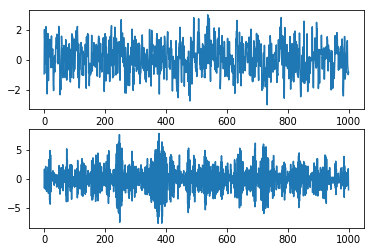

In [15]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

plt.subplot(2,1,1)
ar1 = np.array([1, -0.3])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

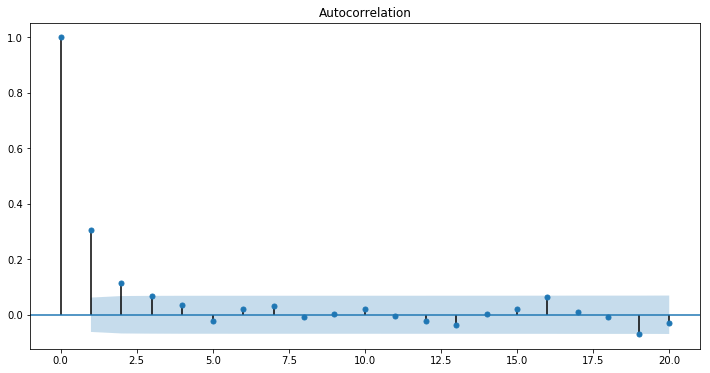

In [32]:
plt.close()
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111)
plot_acf(simulated_data_1,ax=ax,lags=20)
plt.show()

A little difficult to determine the values from the chart because of the quantity. Let's look at the numeric result output.

In [25]:
from statsmodels.tsa.stattools import acf
acf(simulated_data_1,nlags=15)

array([ 1.        ,  0.30426046,  0.11316023,  0.06753476,  0.03389653,
       -0.0222409 ,  0.02056092,  0.03163715, -0.00971266,  0.00275288,
        0.02147943, -0.00499812, -0.023489  , -0.03856081,  0.00431003,
        0.02174337])

In [31]:
acf(simulated_data_1,nlags=15)[1]**np.arange(5)
.3**np.arange(5)

array([ 1.    ,  0.3   ,  0.09  ,  0.027 ,  0.0081])

Notice this does not display the relationship described above... the autocorrelation statistic declines much less rapidly. We fit an AR1 model here... a more detailed discussion is conducted a bit further down.

In [39]:
mod = ARMA(simulated_data_1, order=(1,0)).fit(maxlag=30, ic='aic', trend='nc')
#mdl = ARMA(simulated_data_1).fit(maxlag=30, ic='aic', trend='nc')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1393.434
Method:                       css-mle   S.D. of innovations              0.975
Date:                Sat, 28 Apr 2018   AIC                           2790.868
Time:                        16:54:06   BIC                           2800.683
Sample:                             0   HQIC                          2794.598
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3072      0.030     10.206      0.000       0.248       0.366
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2556           +0.0000j            3.2556            0.0000
-----------------------------------------------------------------------------
"""

The example provided in the lecture fits an AR1 model on stock returns.

Interpreting the coefficient: if negative, the series exhibits mean reversion, if positive, the series exhibits momentum. Bear in mind, the coefficient should still have a value between -1 and 1. Even with this restrictive parameter,  autocorrelation graphs like those available from plot_acf() will exhibit significant autocorrelation at different lags. The closer to 0 the coefficient, the nearer to 0 will be the autocorrelation statistics per a given lag - getting closer to 0 as time moves outward.

To prove this last point, we simulate time series with a given coefficient. The blow is provided with a coefficient of 0.9 (fed into the function with a reverse sign per convention)

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

/home/lechuza/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


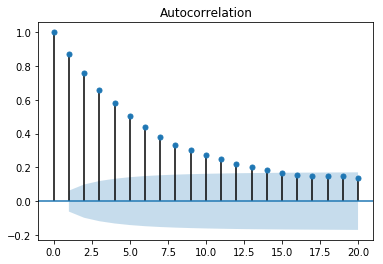

In [3]:
plt.close()
# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plot_acf(simulated_data_1,lags=20,alpha=.05)
plt.show()

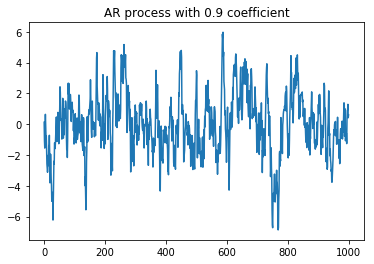

In [4]:
plt.plot(simulated_data_1)
plt.title('AR process with 0.9 coefficient')
plt.show()

### ESTIMATING AN AR MODEL
from statsmodels.tsa.arima_model import ARMA
Parameters - the order number: order=(1,0) is an AR1 model
Among others, included in the model output is a 'constant' term which serves as intercept, and "ar.L1.y" which serves as the coefficient.
FORECASTING AN AR MODEL
requires instantiating the ARMA class with the data and order parameter, then eventually calling the 'plot_predict' function along with a start and end parameter.

#### Techniques to determine order of an AR model
1. Partial Autocorrelation Function
2. Information Criteria

Number 1 measures the incremental benefit of adding another lag to the AR model, ex. an AR3 from an AR4. Interpreting the coefficients: each coefficient is the significance to adding an xth lag to a model that has x-1th lags. This can be plotted in python with **plot_pacf**. You would plot the significance of the lags per model. Interpretation: An PACF run on an AR1 model would take as give that the model includes 1 lag, and calculated significance of more lags.

Number 2 addresses one risk of model complexity: **overfitting**. The information criteria adjusts goodness-of-fit for number of parameters by imposing a penalty on the number of parameters used. Two popular adjusted goodness-of-fit measures:
- AIC
- BIC
These are provided in the model fit summary of an AR model. In practice, you fit several models each with different number of parameters and select the model with the lowest BIC.

#### Examples of model fit estimation

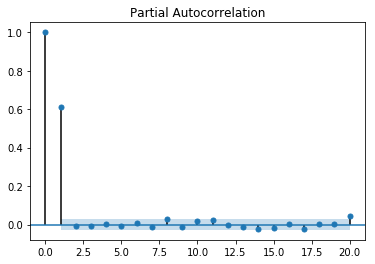

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
# Simulate AR(1) with phi=+0.6... remember that the sign is reversed in the function call
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

#plot PACF for AR(1)
plot_pacf(simulated_data_1,lags=20)
plt.show()

In the above we expected a PACF graph that only shows a significant autocorrelation calc at the first lag as the data was simulated from ARIMA parameters with one significant lag having a coeffcient of +0.6

#### How many lags should I include in my AR model?
AIC and BIC to the rescue. Will compare these values across multiple model permutations. The loop below fits models of differing orders, then plots the BIC in a graph. The optimal number is associated with the lowest BIC value.

Another options is making use of the statsmodels select_order function.

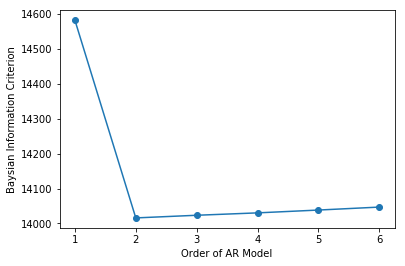

In [6]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

ar2 = np.array([1,-0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)

ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()

In [7]:
#mod = ARMA(simulated_data_2, order=(p,0))
#res = mod.fit()

mdl = AR(simulated_data_2).fit(maxlag=30, ic='aic', trend='nc')
%time est_order = smt.AR(simulated_data_2).select_order(maxlag=30, ic='aic', trend='nc')

NameError: name 'AR' is not defined

## MA Models
Considering lagged error terms or shocks.

$R_{t} = \mu + \epsilon_{t}1 + \theta \epsilon_{t-1}$

$\mu$ = average
$\epsilon$ = shocks from a particular period

If $\theta$ = 0, then the process is white noise.

MA models are staionary for all values of $\theta$.

The video goes over a series of stock returns. Negative and positive $\theta \epsilon_{t-1}$ values:
- negative: a positive shock last period ($\epsilon _{t-1}$) would have caused last period's returns to be positive, but this period's return's would most likely be negative. This is known as one-period mean reversion
- postive: one-period momentum


#### Measuring autocorrelation for MA models
Note: one-period autocorrelation is $\theta/(1+\theta^2)$, not $\theta$

It is difficult to perceive the difference ARMA processes with alternating (positive and negative) values of $\theta$. Positive values of $\theta$ may be expressed as "sticky" value movements because of the conitnued or iterative aspect of the sign of the shock: a positive shock begets another positive shock in the following period.

In [ ]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

plt.close()
# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3,ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()

### Estimating and Forecasting an MA model
Note: All steps beyond the one step ahead forecast is the same value.

In [ ]:
# simulated date has MA parameter = -0.9... data simulated via the ArmaProcess()
mod=ARMA(simulated_data_1,order=(0,1))
res=mod.fit()
res.plot_predict(start=990,end=1010)
plt.show()

### Selecting and determining the suitable AR or MA model
AR series will reveal a signficant lag effect on an ACF plot that dissipates gradually as mentioned above (an exponential decay). When plotted on a partial autocorrelation plot however

On an MA series, the ACF plot will abruptly cut off after the relevant lag/order.

### ARMA models
$R_{t}=\mu+\phi R_{t-1}+\epsilon_{t}+\theta \epsilon_{t-1}$

### OLS MODELS 
Used to estimate the slope coefficients of the autoregressive model. Application assumes that the stochastic process is stationary. If the process is not stationary, the use of OLS can produce invalid estimates. I believe that before commencing on application of an OLS model, stationarity should be tested via a Dickey-Fuller test. If there is evidence of a unit root, some combination of logging and differencing can convert the series to a stationary one.

### Concerns and shortfalls
Overfitting data

### Assignment 3 Requirements
You are selecting at least 2 cryptos and for each you will have 2 columns populated in the P/L table. Each of those 2 columns uses an algorithm and predicts the prices for those 2 cryptos. Whether they appear if a user has bought them or not is a design decision that wont impact your grade, i.e. you can do it either way

### Resources
- Time series basics with pandas: https://www.youtube.com/watch?v=OwnaUVt6VVE
- sci-kit learn ts: https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
- R: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
- python: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/